In [1]:
import json

hands = []
with open('/Volumes/Seagate Backup Plus Drive/Project/hands_valid.json', 'r') as f:
    line = f.readline()
    while line:
        hands.append(json.loads(line))
        line = f.readline()

In [2]:
players = {}
for hand in hands:
    for i in range(hand['num_players']):
        players[hand['players'][i]['user']] = players.get(hand['players'][i]['user'], 0) + 1

In [3]:
import numpy as np

for i in [25, 50, 75, 99]:
    print(str(i) + 'th Percentile: ' + str(np.percentile(np.asarray(list(players.values())), i)))
print('Maximum: ' + str(max(players.values())))

25th Percentile: 3.0
50th Percentile: 11.0
75th Percentile: 46.0
99th Percentile: 939.4099999999944
Maximum: 9721


In [9]:
# Adapted from clean.py in the PokerHandsDataset Repo

top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:100])

fout = open('/Volumes/Seagate Backup Plus Drive/Project/hands_top.json', 'w')
with open('/Volumes/Seagate Backup Plus Drive/Project/hands.json', 'r') as f:
    line = f.readline()
    while line:
        hand = json.loads(line)
        for i in range(hand['num_players']):
            if hand['players'][i]['user'] in top_players:
                fout.write(json.dumps(hand) + '\n')
        line = f.readline()
fout.close()

In [10]:
# Adapted from clean.py in the PokerHandsDataset Repo

top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:10])

fout = open('/Volumes/Seagate Backup Plus Drive/Project/hands_top_10.json', 'w')
with open('/Volumes/Seagate Backup Plus Drive/Project/hands.json', 'r') as f:
    line = f.readline()
    while line:
        hand = json.loads(line)
        for i in range(hand['num_players']):
            if hand['players'][i]['user'] in top_players:
                fout.write(json.dumps(hand) + '\n')
        line = f.readline()
fout.close()

In [4]:
top_hands = []
with open('/Volumes/Seagate Backup Plus Drive/Project/hands_top_10.json', 'r') as f:
    line = f.readline()
    while line:
        top_hands.append(json.loads(line))
        line = f.readline()

In [5]:
len(top_hands)

1378653

# Preflop Betting

In [6]:
top_players = dict(sorted(players.items(), key=lambda x: x[1], reverse=True)[:10])

s_pairs = [('A','A'), ('K','K'), ('Q','Q'), ('J','J'), ('T','T'), ('9','9'), ('8', '8'), \
    ('7','7')]
s_suit = [('A','K'), ('A','Q'), ('A','J'), ('A','T'), ('K','Q'), ('K','J'), \
    ('K','T'), ('Q','J'), ('Q','T'), ('J','T'), ('J', '9'), ('T', '9')]
s_off = [('A','K'), ('A','Q'), ('A','J'), ('A','T'), ('K','Q'), ('K','J')]
a_pairs = [('6','6'), ('5','5')]
a_suit = [('A','9'), ('A','8'), ('A','7'), ('A','6'), ('K','9'), ('Q','9'), \
         ('Q','8'), ('J','8'), ('T','8'), ('9','8')]
a_off = [('K','T'), ('Q','J'), ('Q','T'), ('J','T')]
b_pairs = [('4','4'), ('3','3'), ('2','2')]
b_suit = [('A','5'), ('A','4'), ('A','3'), ('A','2'), ('K','8'), ('K','7'), \
         ('K','6'), ('K','5'), ('K','4'), ('K','3'), ('K','2'), ('J','7'), \
         ('T','7'), ('T','6'), ('9','7'), ('9','6'), ('8','7'), ('8','6'), \
         ('7','6'), ('7','5'), ('6','5'), ('5','4')]
b_off = [('A','9'), ('A','8'), ('A','7'), ('K','9'), ('Q','9'), ('J','9'), \
        ('J','8'), ('T','9'), ('T','8'), ('9','8'), ('9','7'), ('8','7')]

cards = [s_pairs, s_off, a_pairs, a_off, b_pairs, b_off]
norm_lookup = {}
for i in range(len(cards)):
    for c in cards[i]:
        norm_lookup[c] = i // 2
        norm_lookup[(c[1],c[0])] = i // 2
suited = [s_suit, a_suit, b_suit]
suit_lookup = {}
for i in range(len(suited)):
    for c in suited[i]:
        suit_lookup[c] = i // 2
        suit_lookup[(c[1],c[0])] = i // 2
        
def card_value(pocket):
    if pocket[0][1] == pocket[1][1]:
        return suit_lookup.get((pocket[0][0], pocket[1][0]), 3)
    return norm_lookup.get((pocket[0][0], pocket[1][0]), 3)

In [82]:
player_raise = {x: [0,0,0,0] for x in top_players}
player_total = {x: [0,0,0,0] for x in top_players}
for hand in hands:
    for i in range(hand['num_players']):
        if hand['players'][i]['user'] in top_players:
            player = hand['players'][i]['user']
            ind = card_value(hand['players'][i]['pocket_cards'])
            if 'r' in hand['players'][i]['bets'][0]['actions']:
                temp = player_raise[player]
                temp[ind] = temp[ind] + 1
                player_raise[player] = temp
            temp = player_total[player]
            temp[ind] = temp[ind] + 1
            player_total[player] = temp
            
player_perc_raise = {}
for player in top_players:
    temp = []
    for i in range(4):
        temp.append(player_raise[player][i] / player_total[player][i])
    player_perc_raise[player] = temp

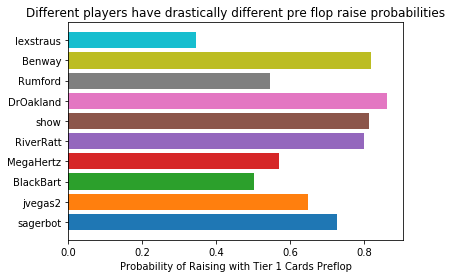

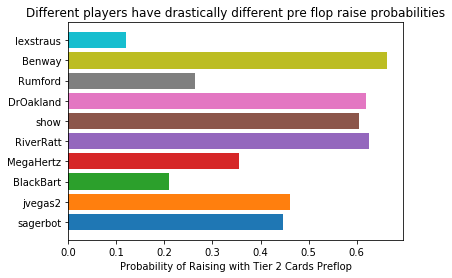

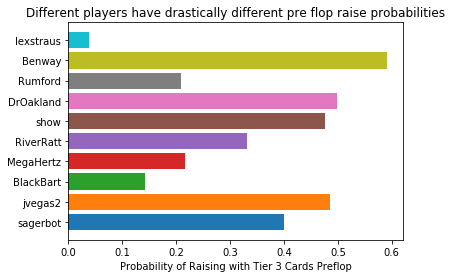

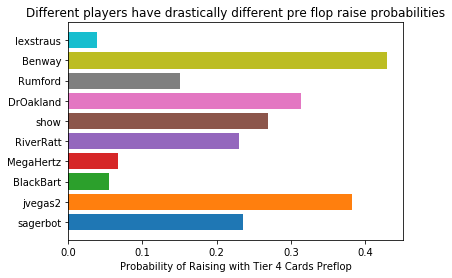

In [88]:
for i in range(4):
    plt.figure()
    for player in top_players:
        plt.barh(player, player_perc_raise[player][i])
        plt.xlabel('Probability of Raising with Tier ' + str(i+1) + ' Cards Preflop')
        plt.title('Different players have drastically different pre flop raise probabilities')

# Range of Open Hands

In [8]:
top = [0,0,0,0]
other = [0,0,0,0]

for hand in hands:
    for i in range(hand['num_players']):
        if hand['players'][i]['user'] in top_players:
            temp = card_value(hand['players'][i]['pocket_cards'])
            top[temp] = top[temp] + 1
        else:
            temp = card_value(hand['players'][i]['pocket_cards'])
            other[temp] = other[temp] + 1

In [9]:
top_tot = sum(top)
oth_tot = sum(other)
top = [x / top_tot for x in top]
other = [x / oth_tot for x in other]

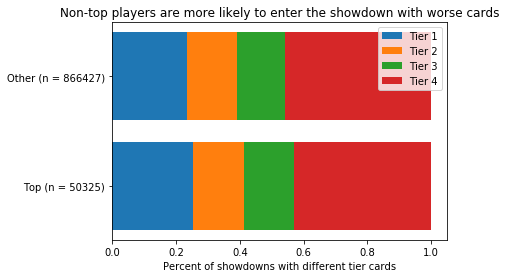

In [10]:
from matplotlib import pyplot as plt
%matplotlib inline

labels = ['Tier 1', 'Tier 2', 'Tier 3', 'Tier 4']
t1 = [top[0], other[0]]
t2 = [top[1], other[1]]
t3 = [top[2], other[2]]
t4 = [top[3], other[3]]
last = [0,0]
for i in range(len([t1, t2, t3, t4])):
    v = [t1,t2,t3,t4][i]
    plt.barh(['Top (n = ' + str(top_tot) + ')', 'Other (n = ' + str(oth_tot) + ')'], width = v, left = last, label=labels[i])
    last[0] = last[0] + v[0]
    last[1] = last[1] + v[1]
plt.xlabel('Percent of showdowns with different tier cards')
plt.title('Non-top players are more likely to enter the showdown with worse cards')
plt.legend()

# Play Style Change

In [64]:
post_win_dur = []
post_win_eve = []
post_loss_dur = []
post_loss_eve = []

for i in range(len(top_hands)):
    try:
        hand = top_hands[i]
        for j in range(hand['num_players']):
            if hand['players'][j]['user'] in top_players:
                player = hand['players'][j]['user']
                if i != 0:
                    last_hand = top_hands[i-1]
                    if last_hand['hand_num'] == hand['hand_num'] - 1:
                        prev_win = False
                        for k in range(last_hand['num_players']):
                            if last_hand['players'][k]['user'] == player:
                                prev_win = last_hand['players'][k]['winnings'] != 0
                        dur = -1
                        eve = 1
                        for l in range(4):
                                if hand['players'][j]['bets'][l]['actions'] == ['f']:
                                    dur = l
                        if hand['players'][j]['bets'][3]['actions'] == ['-'] and hand['players'][j]['winnings'] != 0:
                            eve = 0
                        if dur == -1:
                            dur = 3
                            eve = 0
                        if prev_win:
                            post_win_dur.append(dur)
                            post_win_eve.append(eve)
                        else:
                            post_loss_dur.append(dur)
                            post_loss_eve.append(eve)
    except:
        continue

In [65]:
len(post_loss_eve)

986483

In [66]:
sum(post_loss_eve)

408109

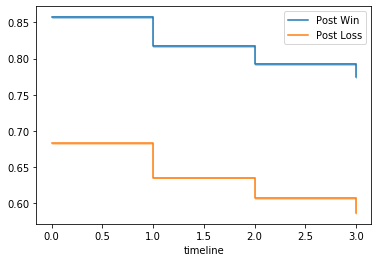

In [68]:
# Adapted from https://towardsdatascience.com/survival-analysis-intuition-implementation-in-python-504fde4fcf8e

from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

kmf.fit(post_win_dur, post_win_eve, label='Post Win')
a1 = kmf.plot(ci_show=True)
kmf.fit(post_loss_dur, post_loss_eve, label='Post Loss')
kmf.plot(ax=a1, ci_show=True)